In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

df = pd.read_csv('twitter_archive_master.csv')
df_image = pd.read_csv('wrangled_image_pred.csv')

### Data Wrangling

In [16]:
df.head(1)

,Unnamed: 0,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,stage,retweet_count,favorite_count
0,0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,NaN,7748.0,36433.0


> drop the columns we do not need: ['Unnamed: 0', 'timestamp', 'text', 'expanded_urls', 'name']

In [17]:
df.drop(['Unnamed: 0', 'timestamp', 'text', 'expanded_urls', 'name'],axis=1, inplace=True)

In [18]:
df.head()

,tweet_id,rating_numerator,rating_denominator,stage,retweet_count,favorite_count
0,892420643555336193,13.0,10,NaN,7748.0,36433.0
1,892177421306343426,13.0,10,NaN,5740.0,31401.0
2,891815181378084864,12.0,10,NaN,3799.0,23657.0
3,891689557279858688,13.0,10,NaN,7913.0,39764.0
4,891327558926688256,12.0,10,NaN,8540.0,37971.0


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2080 entries, 0 to 2079
Data columns (total 6 columns):
tweet_id              2080 non-null int64
rating_numerator      2080 non-null float64
rating_denominator    2080 non-null int64
stage                 336 non-null object
retweet_count         2073 non-null float64
favorite_count        2073 non-null float64
dtypes: float64(3), int64(2), object(1)
memory usage: 97.6+ KB


In [20]:
df.describe()

,tweet_id,rating_numerator,rating_denominator,retweet_count,favorite_count
count,2.080000e+03,2080.000000,2080.0,2073.000000,2073.000000
mean,7.367027e+17,11.656144,10.0,2537.566329,8415.781476
std,6.724699e+16,39.789764,0.0,4446.856819,12226.668632
min,6.660209e+17,0.000000,10.0,11.000000,72.000000
25%,6.767367e+17,10.000000,10.0,561.000000,1857.000000
50%,7.097095e+17,11.000000,10.0,1231.000000,3855.000000
75%,7.880674e+17,12.000000,10.0,2904.000000,10502.000000
max,8.924206e+17,1776.000000,10.0,78388.000000,157470.000000


In [26]:
df.drop(index=list(df.query('rating_numerator>=20').index),inplace=True)`b

### Exploratory Data Analysis

#### Research Question 1: Are the ratings by WeRateDogs relative to the retweet count and favorite count?

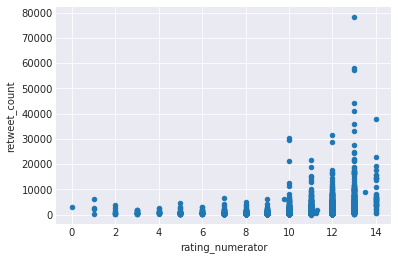

In [27]:
#Let's look at the relationship between 'rating_numerator' and 'retweet_count'

df.plot(x='rating_numerator',y='retweet_count',kind='scatter');

> Yes, they are pretty relative!

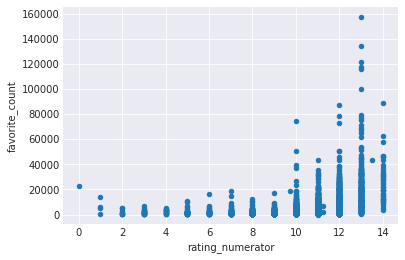

In [28]:
#Let's look at the relationship between 'rating_numerator' and 'favorite count'

df.plot(x='rating_numerator',y='favorite_count',kind='scatter');

> They are relative,too, and I also found that rating_numerator 13 got the highest favorite counts and retweet counts.

#### Research Question 2: Which stage of dogs got the highest retweet counts and favorite counts?

In [29]:
# we only need the rows with stages
df_stage = df[df["stage"].isnull()==False]

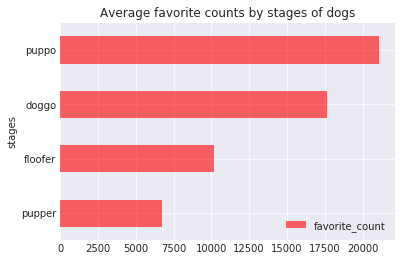

In [30]:
#visualization 'Average favorite counts by stages of dogs'
by_stages = df_stage.query('stage=="pupper" or stage=="doggo" or stage=="puppo" or stage=="floofer"')
favorite_counts_by_stages = pd.DataFrame(by_stages.groupby('stage').favorite_count.mean().sort_values())
favorite_counts_by_stages['stages'] = favorite_counts_by_stages.index
favorite_counts_by_stages.plot(x="stages",y='favorite_count',kind='barh',title="Average favorite counts by stages of dogs",color='r', alpha=0.6)

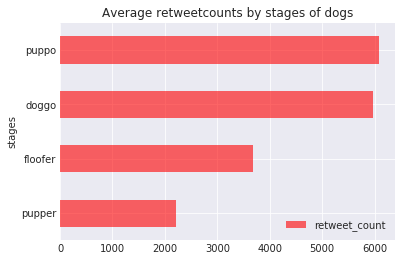

In [31]:
#visualization 'Average retweet counts by stages of dogs'

retweet_count_by_stages = pd.DataFrame(by_stages.groupby('stage').retweet_count.mean().sort_values())
retweet_count_by_stages['stages'] = favorite_counts_by_stages.index
retweet_count_by_stages.plot(x="stages",y='retweet_count',kind='barh',title="Average retweetcounts by stages of dogs",color='r', alpha=0.6)

> The stage of Puppo got the highest retweet counts and favorite counts, which is almost 3 times higher than the breed of pupper.

#### Research Question 3: Whats are the top three breeds of dogs got the average highest retweet counts ?

In [32]:
#extract data that has retweet_count and save them into variable "retweet_and_favorite_count"
#get the index of ids with retweet_count
#create a column called 'predicted_breed' for putting the breed later on.

retweet_and_favorite_count = df[df["retweet_count"].isnull()==False]
id_with_retweet = list(retweet_and_favorite_count.tweet_id)
retweet_and_favorite_count['predicted_breed'] = None

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [33]:
retweet_and_favorite_count.head()

,tweet_id,rating_numerator,rating_denominator,stage,retweet_count,favorite_count,predicted_breed
0,892420643555336193,13.0,10,NaN,7748.0,36433.0,None
1,892177421306343426,13.0,10,NaN,5740.0,31401.0,None
2,891815181378084864,12.0,10,NaN,3799.0,23657.0,None
3,891689557279858688,13.0,10,NaN,7913.0,39764.0,None
4,891327558926688256,12.0,10,NaN,8540.0,37971.0,None


In [34]:
# find the ids that are also in the df_image.
has_data = []

for i in id_with_retweet:
    if len(list(df_image[df_image['tweet_id']==i].p1_dog.index))!=0:
        has_data.append(i)
    
len(has_data)

1643

In [35]:
# use for loop to determine their predicted breed by the highest probability of its predicted breed.

for i in has_data:
    index = list(retweet_and_favorite_count[retweet_and_favorite_count['tweet_id']==i].index)[0]
    if list(df_image[df_image['tweet_id']==i].p1_dog.values)[0] == True:
        retweet_and_favorite_count.predicted_breed[index] = list(df_image[df_image['tweet_id']==i].p1.values)[0]
    elif list(df_image[df_image['tweet_id']==i].p2_dog.values)[0] == True:
        retweet_and_favorite_count.predicted_breed[index] = list(df_image[df_image['tweet_id']==i].p2.values)[0]
    elif list(df_image[df_image['tweet_id']==i].p3_dog.values)[0] == True:
        retweet_and_favorite_count.predicted_breed[index] = list(df_image[df_image['tweet_id']==i].p3.values)[0]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2961: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A va

In [36]:
#test
retweet_and_favorite_count[retweet_and_favorite_count["predicted_breed"].isnull()==False].sample(5)

,tweet_id,rating_numerator,rating_denominator,stage,retweet_count,favorite_count,predicted_breed
2045,666437273139982337,7.0,10,NaN,42.0,117.0,Chihuahua
459,797545162159308800,12.0,10,NaN,5015.0,14959.0,Pembroke
1407,683357973142474752,10.0,10,NaN,917.0,2930.0,Pembroke
1518,678341075375947776,12.0,10,pupper,534.0,1729.0,golden_retriever
1101,705591895322394625,11.0,10,NaN,1151.0,3176.0,basenji


In [37]:
# assess

retweet_and_favorite_count.retweet_count.describe()

count     2071.000000
mean      2534.768711
std       4447.146735
min         11.000000
25%        560.000000
50%       1228.000000
75%       2897.500000
max      78388.000000
Name: retweet_count, dtype: float64

In [38]:
# I determined to use 3 criteria to extract the result:
#1. the breeds that have at least 10 counts because the data is more stable
#2. which's std shoould be lower than 4446.856819 (std of whole dataset)
#3. which's mean is bigger that 4659.227536(mean of whole dataset).

result_df = retweet_and_favorite_count.groupby('predicted_breed').retweet_count.describe()
result_df = result_df.query('count >= 10.0')
result_df = result_df[result_df['std'] < 4446.856819]
result_df = result_df[result_df['mean'] > 2537]
result_df = result_df.sort_values(by=['mean'], ascending=False)

In [39]:
result_df.head(3)

,count,mean,std,min,25%,50%,75%,max
predicted_breed,,,,,,,,
Great_Pyrenees,14.0,4200.785714,4439.868019,592.0,1446.25,1807.0,4938.25,15405.0
Cardigan,21.0,3348.285714,3366.409217,200.0,1377.00,2032.0,3664.00,11985.0
golden_retriever,153.0,3327.692810,3959.882839,47.0,1090.00,2073.0,3901.00,24685.0


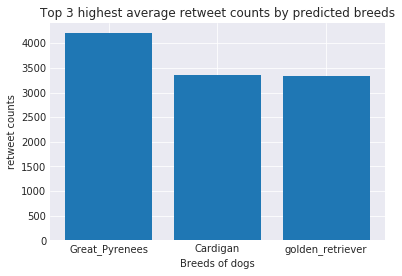

In [40]:
#visualization 'Top 3 highest average retweet counts by predicted breeds'
locations = [1,2,3]
top3 = result_df.head(3)

mean_retweet_counts = list(top3['mean'])

labels =  list(top3.index)

plt.bar(locations, mean_retweet_counts, tick_label=labels)

plt.title('Top 3 highest average retweet counts by predicted breeds')
plt.xlabel('Breeds of dogs')
plt.ylabel('retweet counts');

> Great Pyenees, Cardigan, and Golden retriever are top 3 highest average retweet counts by predicted breeds. And, the top 1 breed get average 600 counts higher than the top 2 one.

#### Research Question 4: Whats are the top 5 underrated and overrated breeds of dogs? (being underrated means got the low scores from WeRateDogs but got high retweet counts and vice versa)

In [41]:
# save the data with predicted breeds into variable 'df_with_breed'

df_with_breed = retweet_and_favorite_count[retweet_and_favorite_count["predicted_breed"].isnull()==False]
df_with_breed.retweet_count.describe()

count     1643.000000
mean      2528.241023
std       4600.169413
min         11.000000
25%        564.500000
50%       1257.000000
75%       2871.500000
max      78388.000000
Name: retweet_count, dtype: float64

In [42]:
df_with_breed.rating_numerator.describe()

count    1643.000000
mean       10.818491
std         1.776800
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max        14.000000
Name: rating_numerator, dtype: float64

In [43]:
#devide the retweet_count and rating_numerator into 4 levels: 
# [ 'Low', 'Medium','Moderately High' ,'High' ]

bin1_edges = [11 ,564 ,1257 ,2871 ,78388] 
bin1_names = ['Low', 'Medium','Moderately High' ,'High'  ]

df_with_breed['retweet_levels'] = pd.cut(df_with_breed['retweet_count'], bin1_edges, labels=bin1_names)

bin2_edges = [0 ,10 ,11 ,12 ,14] 
bin2_names = ['Low', 'Medium','Moderately High' ,'High'  ]

df_with_breed['rating_levels'] = pd.cut(df_with_breed['rating_numerator'], bin2_edges, labels=bin2_names)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


In [44]:
df_with_breed.head()

,tweet_id,rating_numerator,rating_denominator,stage,retweet_count,favorite_count,predicted_breed,retweet_levels,rating_levels
1,892177421306343426,13.0,10,NaN,5740.0,31401.0,Chihuahua,High,High
2,891815181378084864,12.0,10,NaN,3799.0,23657.0,Chihuahua,High,Moderately High
3,891689557279858688,13.0,10,NaN,7913.0,39764.0,Labrador_retriever,High,High
4,891327558926688256,12.0,10,NaN,8540.0,37971.0,basset,High,Moderately High
5,891087950875897856,13.0,10,NaN,2858.0,19111.0,Chesapeake_Bay_retriever,Moderately High,High


In [45]:
#find the underrated and overrated data based on whether its difference of levels are more than
#2 levels (i.e High vs. Medium or Moderately High vs. Low, vice versa.)

underrated_df = df_with_breed.query('retweet_levels == "High" and rating_levels == "Medium" or retweet_levels == "Moderately High" and rating_levels == "Low" or retweet_levels == "High" and rating_levels == "Low" ')
overrated_df = df_with_breed.query('retweet_levels == "Low" and rating_levels == "Moderately High" or retweet_levels == "medium" and rating_levels == "High" or retweet_levels == "low" and rating_levels == "High"')

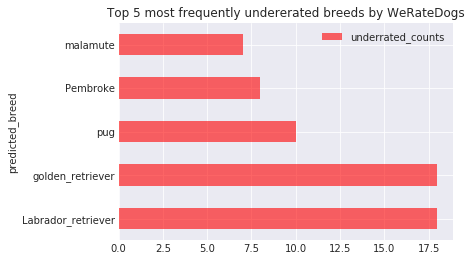

In [46]:
# Visualize Top 5 most frequently undererated breeds by WeRateDogs

underrated = underrated_df.groupby('predicted_breed').tweet_id.count().sort_values(ascending=False).head(5)
underrated = pd.DataFrame(underrated)
underrated.rename(columns={'tweet_id':'underrated_counts'}, inplace=True)
underrated['predicted_breed'] = underrated.index
underrated.plot(x="predicted_breed",y='underrated_counts',kind='barh',title="Top 5 most frequently undererated breeds by WeRateDogs",color='r', alpha=0.6);

> The top 5 most frequently underrated breeds by WeRateDogs are Labrador Retriver, Golden Retriever, pug, Pembroke, maiamute. The top 1, Labrador Retriver is almost as 2 times frequently underrated as Pembroke.

In [47]:
underrated.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, Labrador_retriever to malamute
Data columns (total 2 columns):
underrated_counts    5 non-null int64
predicted_breed      5 non-null object
dtypes: int64(1), object(1)
memory usage: 120.0+ bytes


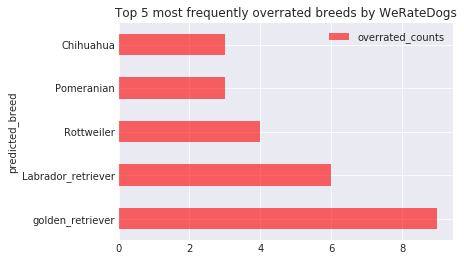

In [48]:
# Visualize Top 5 most frequently overerated breeds by WeRateDogs

overrated = overrated_df.groupby('predicted_breed').tweet_id.count().sort_values(ascending=False).head(5)
overrated= pd.DataFrame(overrated)
overrated.rename(columns={'tweet_id':'overrated_counts'}, inplace=True)
overrated['predicted_breed'] = overrated.index
overrated.plot(x="predicted_breed",y='overrated_counts',kind='barh',title="Top 5 most frequently overrated breeds by WeRateDogs",color='r', alpha=0.6);

> The top 5 most frequently overrated breeds by WeRateDogs are Golden Retriever, American Staffordshire terrior, Cardigan, chow, Pomeranian.
The top 1, Golden Retriever, is almost as 2 times frequently underrated as the rest.